In [1]:
!pwd

/Users/bilindhajer/atl-dat3/lessons/lesson-05/code


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

df = pd.read_csv("./datasets/dataset.csv")

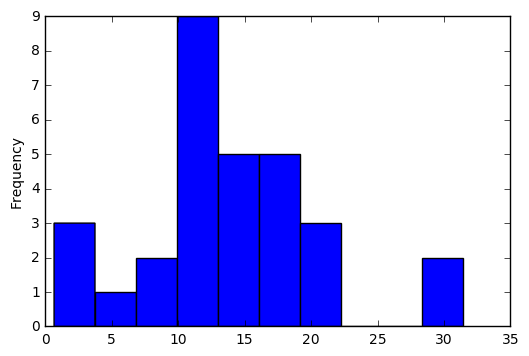

In [2]:
# create a histogram for the dataFrame
measurements = df.measurements
measurements.plot( kind = "hist" )

In [4]:
# find the length of measurements
n = len( measurements )

print n

30


In [5]:
# get the mean and standard_deviation of the dataset
mean = measurements.mean()
print mean

stdev = measurements.std()
print stdev

14.0224282791
6.73042721173


In [6]:
# sort measurements from least to greatest
measurementsSorted = np.sort( measurements )

In [6]:
print( measurementsSorted )

[  0.65420069   2.51073122   3.57326044   6.32880343   9.6196068
   9.68612379   9.93590727   9.95752217  10.43264987  11.52707377
  11.66162395  11.95896084  12.13868406  12.61624737  12.82338917
  14.64197822  14.975124    15.52200558  15.81075811  15.82163004
  16.85730122  16.95646689  17.40759363  17.53112835  17.56077884
  20.1448896   20.22467755  20.95836562  29.37931847  31.45604741]


In [7]:
# generate n numbers from a normal distribution with same mean and stdev
# sort these numbers from least to greatest

numsNormal = np.random.normal(loc=mean, scale=stdev, size=n)
numsNormal = np.sort( numsNormal )

In [11]:
# generate n numbers from a exponential distribution, note you need the rate parameter for exponential

numsExponential = np.random.exponential( scale = mean, size=n )
numsExponential = np.sort( numsExponential )

In [12]:
# generate n numbers from a uniform distribution, note you need a, and b parameters for uniform ( min and max )

minNum = measurements.min()
maxNum = measurements.max()

numsUniform = np.random.uniform( low = minNum, high = maxNum, size = n )
numsUniform = np.sort( numsUniform )

In [13]:
# print a scatter plot of actual quantiles (your sorted dataset) vs hypothetical quantiles (generated numbers)
# from each distribution.

objects = {
            "measurements" : measurementsSorted, 
            "numsNormal"   : numsNormal, 
            "numsExponential" : numsExponential,
            "numsUniform" : numsUniform
          }

df = pd.DataFrame( objects ) 

In [25]:
import statsmodels.formula.api as smf

formulas = ['measurements ~ numsNormal',
           'measurements ~ numsExponential',
           'measurements ~ numsUniform']

def fitModel(formula):
    return smf.ols(formula, data=df).fit()

for formula in formulas:
    results = fitModel(formula)
    print results.summary()

    

# formula = 'numsNormal ~ measurements'

# lm = smf.ols(formula, data=df).fit()

# print lm.summary()

                            OLS Regression Results                            
Dep. Variable:           measurements   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     348.3
Date:                Wed, 07 Dec 2016   Prob (F-statistic):           2.47e-17
Time:                        20:36:59   Log-Likelihood:                -60.284
No. Observations:                  30   AIC:                             124.6
Df Residuals:                      28   BIC:                             127.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.6896      0.650      5.674      0.0

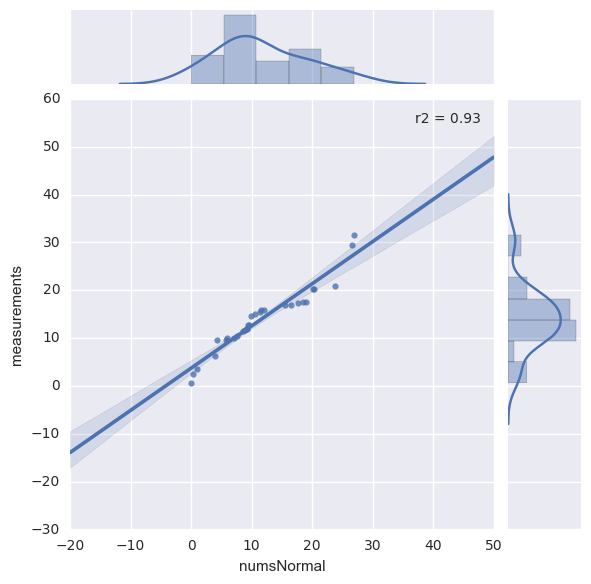

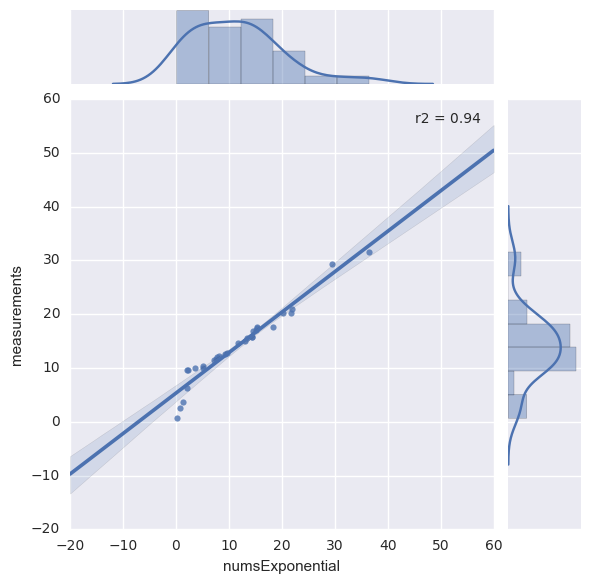

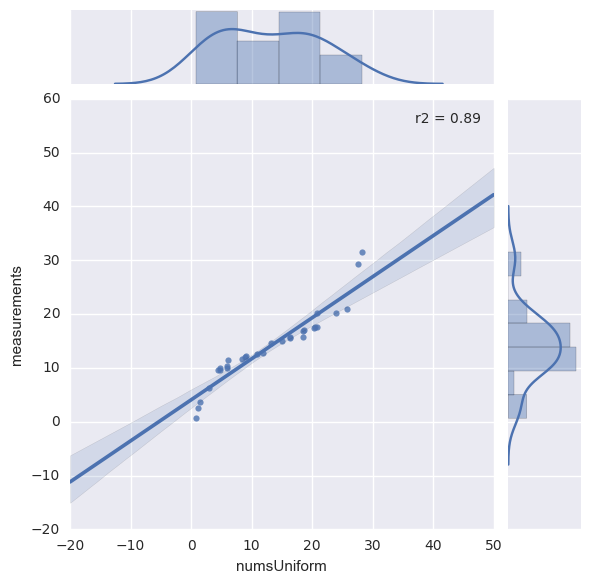

In [14]:
import seaborn as sns
from scipy import stats

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

sns.jointplot(df.numsNormal, df.measurements, kind="reg", stat_func=r2)
sns.jointplot(df.numsExponential, df.measurements, kind="reg", stat_func=r2)
sns.jointplot(df.numsUniform, df.measurements, kind="reg", stat_func=r2)

In [15]:
import statsmodels.api as smf

formula = 'numsNormal ~ measurements'

lm = smf.ols()